In [1]:
# import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import confusion_matrix
from sklearn.utils import shuffle

import tensorflow as tf

from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers.convolutional import Conv2D, MaxPooling2D
#from keras.import backend as K
from keras.utils import np_utils

import warnings
warnings.filterwarnings('ignore')

sns.set()

In [4]:
dataset = pd.read_csv("C:\\Users\\konga\\Downloads\\A_Z Handwritten Data.csv\\A_Z Handwritten Data.csv")
dataset.head()

,0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,...,0.639,0.640,0.641,0.642,0.643,0.644,0.645,0.646,0.647,0.648
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [5]:
dataset.shape

(372450, 785)

In [6]:
# the first columns is the labels
dataset.rename(columns={'0': 'label'}, inplace=True)

In [7]:
# split the data into X and y
X = dataset.drop('label', axis=1)
y = dataset['label']
X.shape, y.shape

((372450, 784), (372450,))

In [8]:

X_shuffle = shuffle(X)

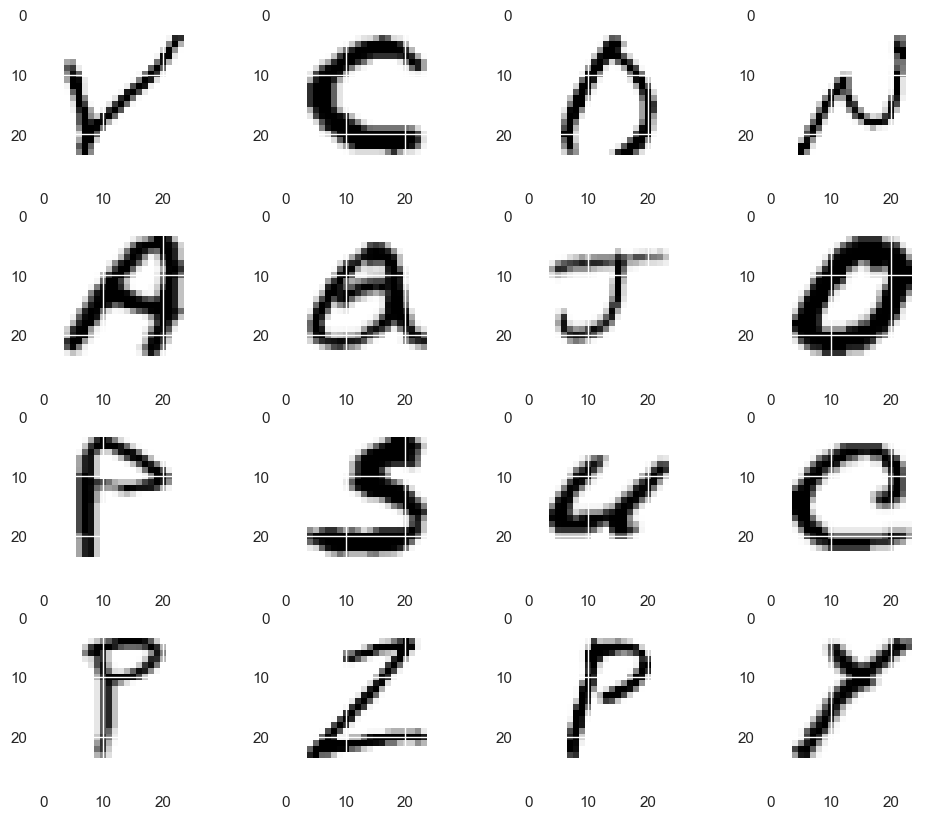

In [9]:
# plot the data
plt.figure(figsize=(12, 10))
row, columns = 4, 4
for i in range(16):
    plt.subplot (columns, row, i+1)
    plt.imshow(X_shuffle.iloc[i].values.reshape(28, 28), interpolation='nearest', cmap='Greys')
plt.show()

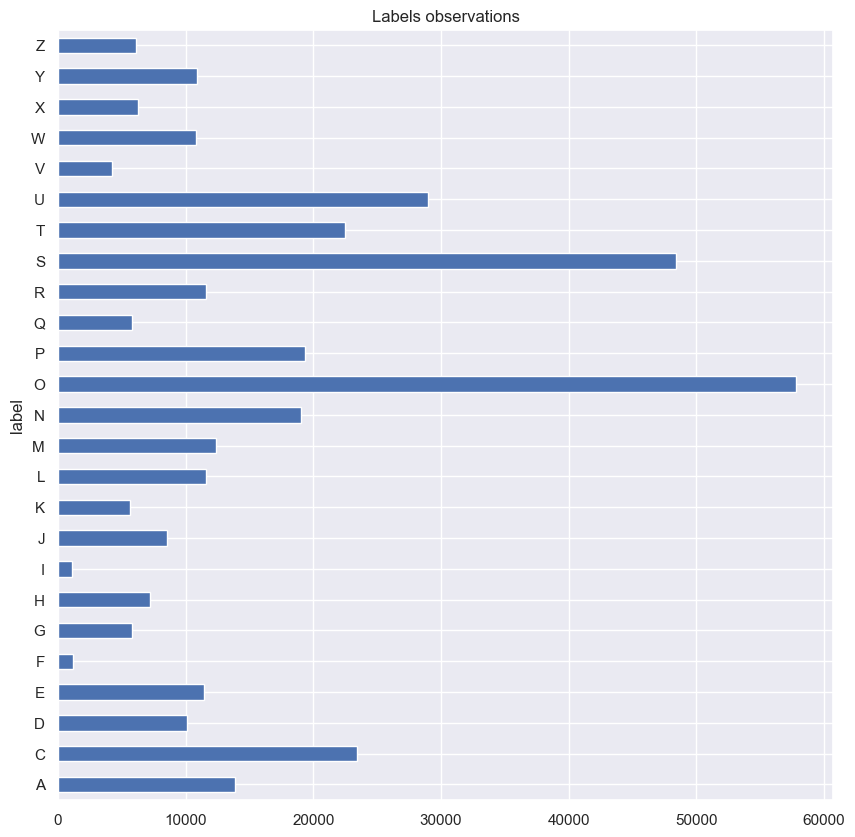

In [10]:
alphabets = {0:'A', 2:'B',2:'C',3:'D',4:'E',5:'F',6:'G',
             7:'H',8:'I',9:'J',10:'K',11:'L',12:'M',13:'N',
             14:'O',15:'P',16:'Q',17:'R',18:'S',19:'T',
             20:'U',21:'V',22:'W',23:'X',24:'Y',25:'Z'}
dataset_alphabets = dataset.copy()
dataset['label'] = dataset['label'].map(alphabets)

label_size = dataset.groupby('label').size()
label_size.plot.barh(figsize=(10, 10))
plt.title('Labels observations')
plt.show()

In [11]:
# split and scale the data
X_train, X_test, y_train, y_test = train_test_split(X, y)
standard_scaler = MinMaxScaler()
train_scaled = standard_scaler.fit_transform(X_train)
test_scaled = standard_scaler.transform(X_test)
train_scaled[0][:10]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [12]:
# reshape the data
train_scaled = train_scaled.reshape(X_train.shape[0], 28, 28, 1).astype('float32')
test_scaled = test_scaled.reshape(X_test.shape[0], 28, 28, 1).astype('float32')

# convert the labels to categorical
y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)

In [13]:
model = Sequential()
model.add(Conv2D(32, (5, 5), input_shape=(28, 28, 1), 
                 activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.3))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(len(y.unique()), activation='softmax'))

model.compile(loss='categorical_crossentropy',
              optimizer='adam', metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 24, 24, 32)        832       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 12, 12, 32)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 12, 12, 32)        0         
                                                                 
 flatten (Flatten)           (None, 4608)              0         
                                                                 
 dense (Dense)               (None, 128)               589952    
                                                                 
 dense_1 (Dense)             (None, 26)                3354      
                                                        

In [ ]:
history = model.fit(train_scaled, y_train, 
                    validation_data=(test_scaled, y_test),
                    epochs=5, batch_size=200, verbose=2)

scores = model.evaluate(test_scaled, y_test, verbose=0)
print('CNN score: ', scores[1])

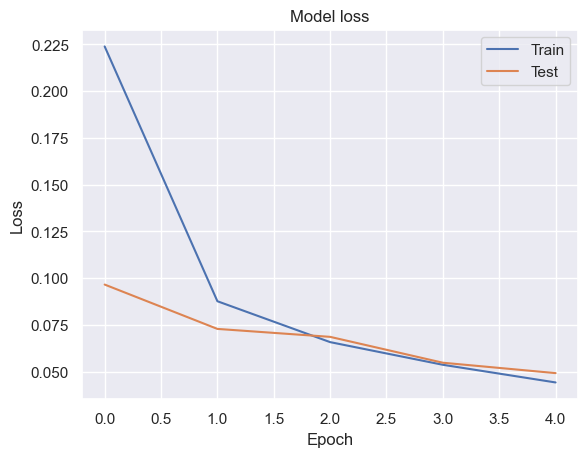

In [16]:
# plot the model loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Test'])
plt.show()